# Periodic 1D nearest neighbor chain

Notice how nearest neighbor periodic 1D chain is interpreted as *next* to nearest neighbor 1D chain with open boundaries.\
Cool and unknown result

In [6]:
import pulser
import numpy as np
import torch
import helpers as helpers
import emu_mps.optimatrix as optimatrix

In [7]:
def one_dim_systems_coords(L: int) -> np.ndarray:
    coords = (
        np.array(
            [
                (np.cos(theta * 2 * np.pi / L), np.sin(theta * 2 * np.pi / L))
                for theta in range(L)
            ]
        )
    )

    reg = pulser.Register.from_coordinates(coords, prefix=None)
    return reg


original_chain = one_dim_systems_coords(10)
chain = helpers.shuffle_qubits(original_chain)


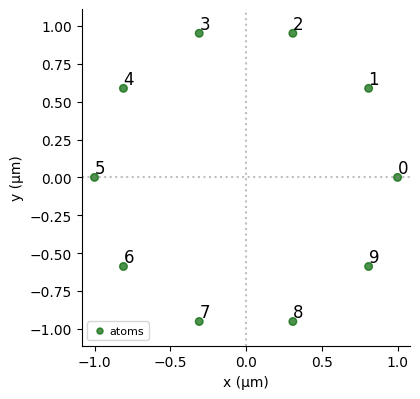

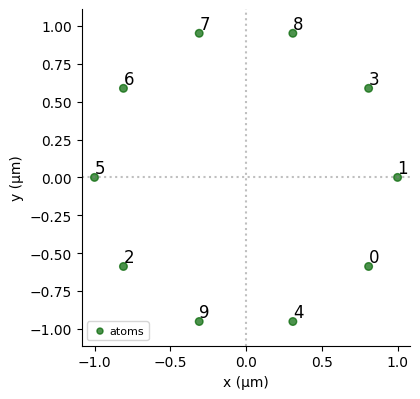

In [8]:

original_chain.draw()
chain.draw()


tensor([[0.0000, 2.6180, 0.3820, 0.7236, 2.6180, 0.2764, 0.2500, 0.2764, 0.3820,
         0.7236],
        [2.6180, 0.0000, 0.2764, 2.6180, 0.7236, 0.2500, 0.2764, 0.3820, 0.7236,
         0.3820],
        [0.3820, 0.2764, 0.0000, 0.2500, 0.7236, 2.6180, 0.7236, 0.3820, 0.2764,
         2.6180],
        [0.7236, 2.6180, 0.2500, 0.0000, 0.3820, 0.2764, 0.3820, 0.7236, 2.6180,
         0.2764],
        [2.6180, 0.7236, 0.7236, 0.3820, 0.0000, 0.3820, 0.2764, 0.2500, 0.2764,
         2.6180],
        [0.2764, 0.2500, 2.6180, 0.2764, 0.3820, 0.0000, 2.6180, 0.7236, 0.3820,
         0.7236],
        [0.2500, 0.2764, 0.7236, 0.3820, 0.2764, 2.6180, 0.0000, 2.6180, 0.7236,
         0.3820],
        [0.2764, 0.3820, 0.3820, 0.7236, 0.2500, 0.7236, 2.6180, 0.0000, 2.6180,
         0.2764],
        [0.3820, 0.7236, 0.2764, 2.6180, 0.2764, 0.3820, 0.7236, 2.6180, 0.0000,
         0.2500],
        [0.7236, 0.3820, 2.6180, 0.2764, 2.6180, 0.7236, 0.3820, 0.2764, 0.2500,
         0.0000]])
optimal p

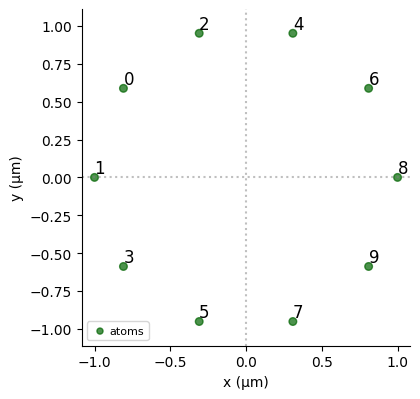

In [9]:
interactions = helpers.reciprocal_dist_matrix(chain)
print(interactions)
optimal_permutation = optimatrix.minimize_bandwidth(interactions)
print("optimal permutation is\n", optimal_permutation)
chain = helpers.permute_sequence_registers(chain, optimal_permutation)

chain.draw()

In [10]:
m = 5

upper = torch.diag(torch.ones(m - 1), diagonal=1)
lower = torch.diag(torch.ones(m - 1), diagonal=-1)
initial_mat = upper + lower
initial_mat[m - 1, 0] = initial_mat[0, m - 1] = 1


optimal_permutation = optimatrix.minimize_bandwidth(interactions)

print(optimatrix.permute_tensor(interactions, optimal_permutation))


tensor([[0.0000, 2.6180, 2.6180, 0.7236, 0.7236, 0.3820, 0.3820, 0.2764, 0.2764,
         0.2500],
        [2.6180, 0.0000, 0.7236, 2.6180, 0.3820, 0.7236, 0.2764, 0.3820, 0.2500,
         0.2764],
        [2.6180, 0.7236, 0.0000, 0.3820, 2.6180, 0.2764, 0.7236, 0.2500, 0.3820,
         0.2764],
        [0.7236, 2.6180, 0.3820, 0.0000, 0.2764, 2.6180, 0.2500, 0.7236, 0.2764,
         0.3820],
        [0.7236, 0.3820, 2.6180, 0.2764, 0.0000, 0.2500, 2.6180, 0.2764, 0.7236,
         0.3820],
        [0.3820, 0.7236, 0.2764, 2.6180, 0.2500, 0.0000, 0.2764, 2.6180, 0.3820,
         0.7236],
        [0.3820, 0.2764, 0.7236, 0.2500, 2.6180, 0.2764, 0.0000, 0.3820, 2.6180,
         0.7236],
        [0.2764, 0.3820, 0.2500, 0.7236, 0.2764, 2.6180, 0.3820, 0.0000, 0.7236,
         2.6180],
        [0.2764, 0.2500, 0.3820, 0.2764, 0.7236, 0.3820, 2.6180, 0.7236, 0.0000,
         2.6180],
        [0.2500, 0.2764, 0.2764, 0.3820, 0.3820, 0.7236, 0.7236, 2.6180, 2.6180,
         0.0000]])
